# Basic Filtering in Python
### Implementing basic high, low, bandpass, bandstop filters in Python
#### Ryan Marren, Oct 3 2016

Lets start with some sine-waves

In [1]:
import sys
sys.path.append('../src/')

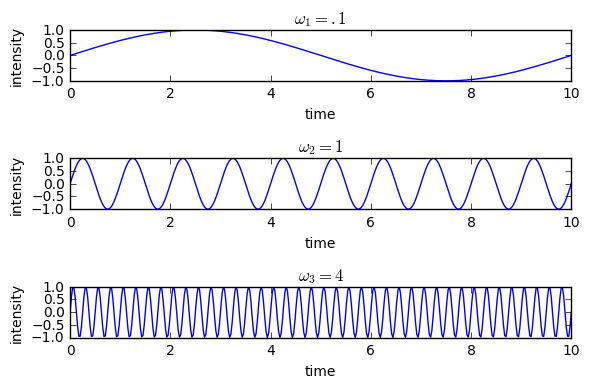

In [2]:
from utils.fourier import (butter_lowpass_filter,
                           butter_highpass_filter,
                           butter_bandpass_filter,
                           butter_bandstop_filter)
import numpy as np
import matplotlib.pyplot as plt
T = 10 # Signal lasts 10 seconds
Fs = 40 # We sample the signal at 40 Hz
w1 = .1
w2 = 1
w3 = 4
sample_points = np.linspace(0, T, T * Fs)
sines_w1 = np.sin(w1 * 2 * np.pi * sample_points)
sines_w2 = np.sin(w2 * 2 * np.pi * sample_points)
sines_w3 = np.sin(w3 * 2 * np.pi * sample_points)
plt.subplot(3, 1, 1)
plt.plot(sample_points, sines_w1)
plt.xlabel("time")
plt.ylabel("intensity")
plt.title(r'$\omega_1 = .1$')
plt.subplot(3, 1, 2)
plt.plot(sample_points, sines_w2)
plt.title(r'$\omega_2 = 1$')
plt.xlabel("time")
plt.ylabel("intensity")
plt.subplot(3, 1, 3)
plt.plot(sample_points, sines_w3)
plt.title(r'$\omega_3 = 4$')
plt.xlabel("time")
plt.ylabel("intensity")
plt.tight_layout()
plt.show()

Summing these signals gives:

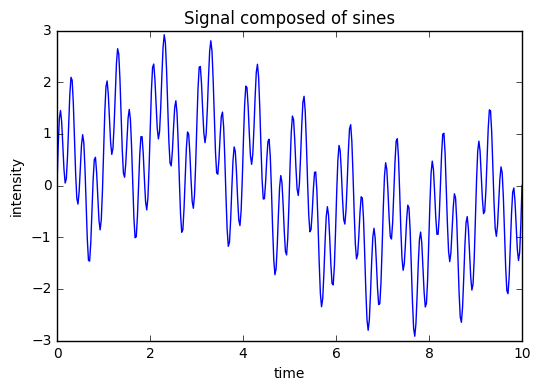

In [3]:
signal = sines_w1 + sines_w2 + sines_w3
plt.plot(sample_points, signal)
plt.title('Signal composed of sines')
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

We can convert this signal to the frequency domain with a Fourier Transform to see what frequency signals compose it:

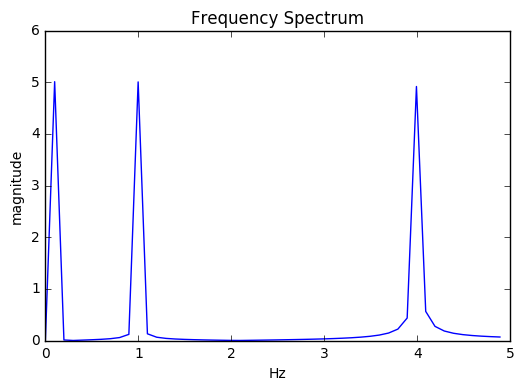

In [4]:
# abs to get the real part, and we take the second half of the data to remove the symmetry
dt = sample_points[1] - sample_points[0]
ft = np.fft.fft(signal) * dt
ft = ft[: len(sample_points)/2]
freq = np.fft.fftfreq(len(sample_points), dt)
freq = freq[:len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft)[0:50])
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

As we can see, there are spikes at $\omega_1 = 0.1, \omega_2 = 1$, $\omega_3 = 4$

Now let's see what kind of filtering we can do to extract different frequency components of the signal. First, lets try a low-pass filter to get rid of the $\omega_3$ component.

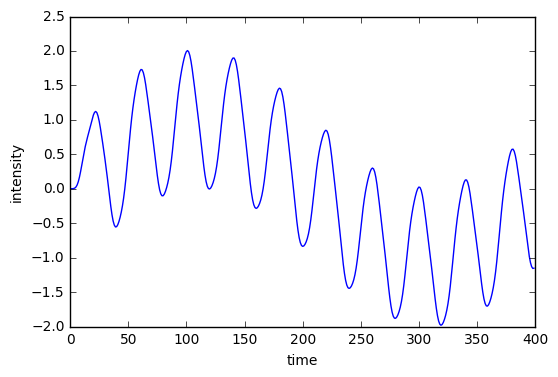

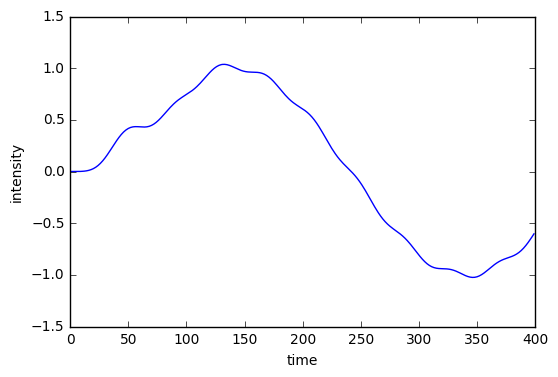

In [5]:
signal_lp_2 = butter_lowpass_filter(signal, 2, Fs, 5)
plt.plot(signal_lp_2)
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()
signal_lp_half = butter_lowpass_filter(signal, .5, Fs, 5)
plt.plot(signal_lp_half)
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

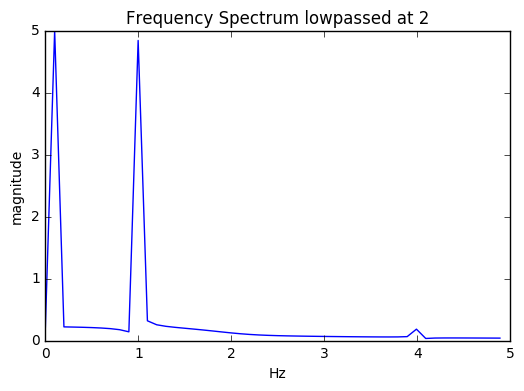

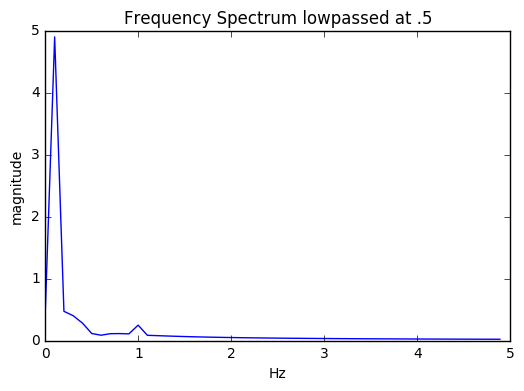

In [6]:
ft_lp = np.fft.fft(signal_lp_2) * dt
ft_lp = ft_lp[: len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft_lp)[0:50])
plt.title('Frequency Spectrum lowpassed at 2')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()
ft_lp = np.fft.fft(signal_lp_half) * dt
ft_lp = ft_lp[: len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft_lp)[0:50])
plt.title('Frequency Spectrum lowpassed at .5')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

Now let's try to use a high-pass filter to get rid of the low frequency $\omega_1$.

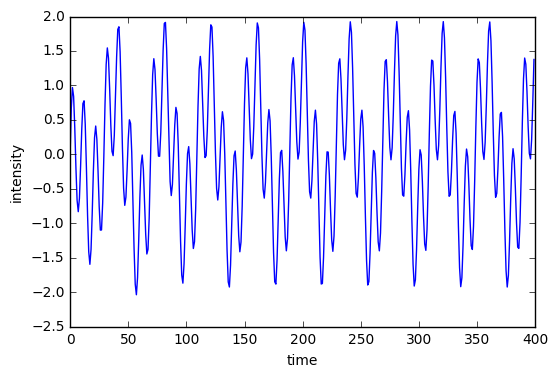

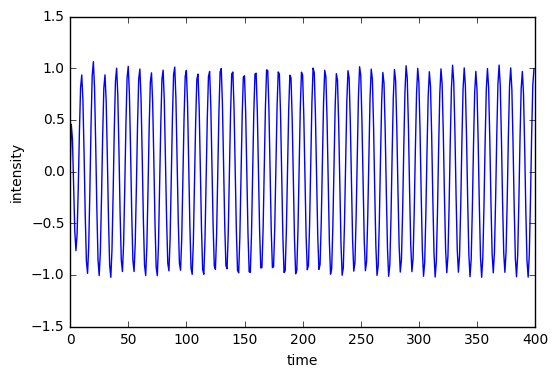

In [7]:
signal_hp_half = butter_highpass_filter(signal, .5, Fs, 5)
plt.plot(signal_hp_half)
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()
signal_hp_2 = butter_highpass_filter(signal, 2, Fs, 5)
plt.plot(signal_hp_2)
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

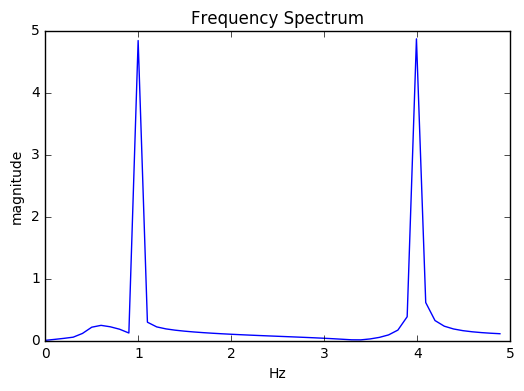

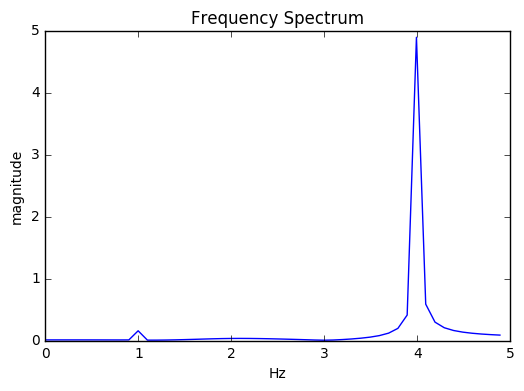

In [8]:
ft_hp = np.fft.fft(signal_hp_half) * dt
ft_hp = ft_hp[: len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft_hp)[0:50])
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()
ft_hp = np.fft.fft(signal_hp_2) * dt
ft_hp = ft_hp[: len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft_hp)[0:50])
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

Finally, we can use a bandpass filter which can isolate the middle frequency component $\omega_2 = 1$. We implement as follows:

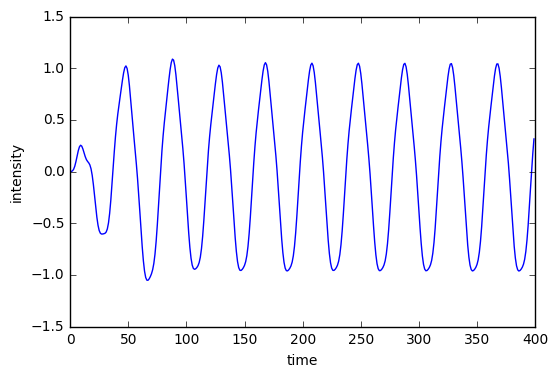

In [9]:
signal_bp = butter_bandpass_filter(signal, [.6, 2], Fs, 3)
plt.plot(signal_bp)
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

and we can see that the middle frequency component is all thats left! We can prove it in the frequency domain:

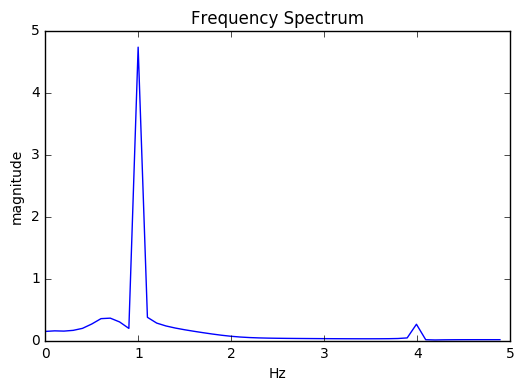

In [10]:
ft_bp = np.fft.fft(signal_bp) * dt
ft_hb = ft_bp[: len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft_bp)[0:50])
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

This is useful, but for our EEG data we want the inverse of this process. Namely, there is a lot of noise at 60 Hz because of the power line component. What we want is a 'notch' filter, which keeps everything except for the frequency within a certain range. This can be implemented as follows:

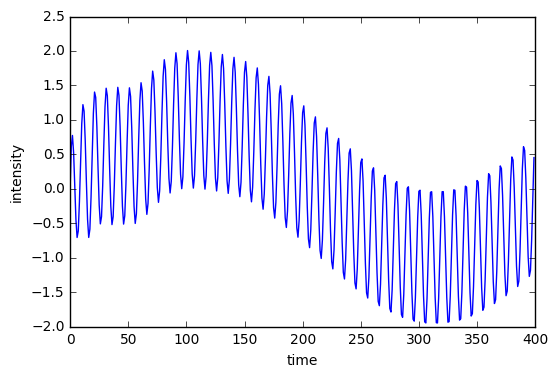

In [11]:
signal_bs = butter_bandstop_filter(signal, [.6, 2], Fs, 3)
plt.plot(signal_bs)
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

And we see a composition of low and high frequency components (e.g., the $\omega_2$ component is gone!).

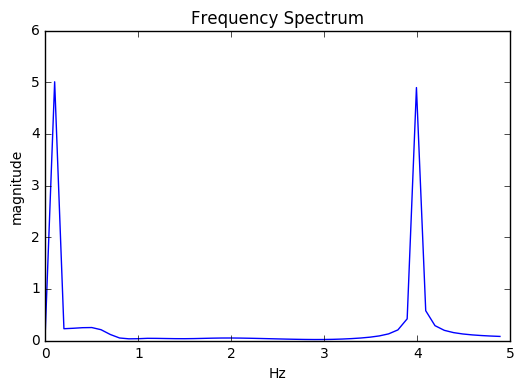

In [12]:
ft_bs = np.fft.fft(signal_bs) * dt
ft_bs = ft_bs[: len(sample_points)/2]
plt.plot(freq[0:50] , np.abs(ft_bs)[0:50])
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

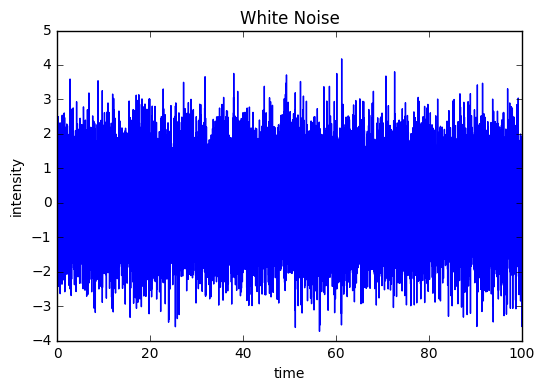

In [13]:
T = 100
Fs = 300
mean = 0
std = 1 
wn = np.random.normal(mean, std, size=T * Fs)
times = np.arange(len(wn)) / float(Fs)

plt.plot(times, wn)
plt.title("White Noise")
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

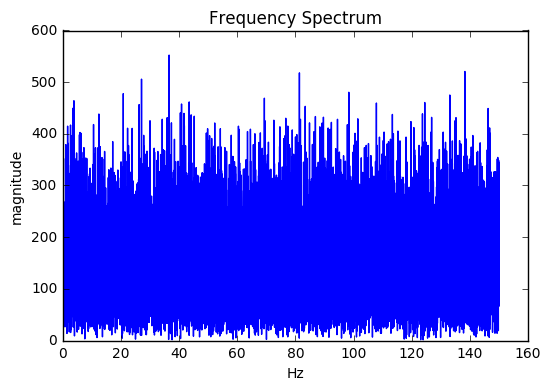

In [14]:
dt = times[1] - times[0]
ft_wn = np.fft.fft(wn)
ft_wn = ft_wn[: len(wn)/2]
freq_wn = np.fft.fftfreq(len(wn), dt)
freq_wn = freq_wn[:len(wn)/2]
plt.plot(freq_wn , np.abs(ft_wn))
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

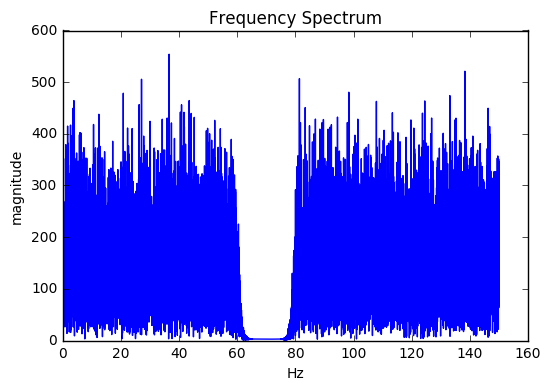

In [15]:
wn_filt = butter_bandstop_filter(wn, [60, 80], Fs, 10)
ft_wn = np.fft.fft(wn_filt)
ft_wn = ft_wn[: len(wn_filt)/2]
freq_wn = np.fft.fftfreq(len(wn_filt), dt)
freq_wn = freq_wn[:len(wn_filt)/2]
plt.plot(freq_wn , np.abs(ft_wn))
plt.title('Frequency Spectrum')
plt.xlabel("Hz")
plt.ylabel("magnitude")
plt.show()

In [16]:
import random
for i in xrange(1000):
    x = random.random() * 100
    y = random.random() * 30 + x + 10
    wn_filt = butter_bandstop_filter(wn, [min(x, y), max(x, y)], Fs, 10)
    ft_wn = np.fft.fft(wn_filt)
    ft_wn = ft_wn[: len(wn_filt)/2]
    freq_wn = np.fft.fftfreq(len(wn_filt), dt)
    freq_wn = freq_wn[:len(wn_filt)/2]
    mid = (x + y) / 2.0
    idx = (np.abs(freq_wn - mid)).argmin()
    assert not (abs(ft_wn[idx]) < 1000 and abs(ft_wn[idx]) > 100)